# Practice Notebook

Dear participants,

Welcome to your practice notebook! This is your opportunity to reinforce the basic python steps that you learned during the first part of this course. Next week, we will spend more time practicing the implementation of larger models that can be applied to health care problems.

While solutions are provided, I encourage you to challenge yourself: try to solve each task on your own before peeking! Use this notebook to experiment, explore, and build confidence in using Python, Pandas, plotting, and SCIP.

Happy coding!

## Task 1: Basic Python Practice

Let's begin with some simple Python exercises to warm up.

### ✏️ Subtask 1: Celsius to Fahrenheit
Write a function that takes a temperature in Celsius and returns the temperature in Fahrenheit.

**Formula:**
$$ \text{Fahrenheit} = \text{Celsius} \times \frac{9}{5} + 32 $$

Name your function **celsius_to_fahrenheit**.

In [7]:
# Code Cell (Subtask 1: Celsius to Fahrenheit)
def celsius_to_fahrenheit(d):
    farhenheit=d*9/5+32
    return farhenheit
# Remember, you need to define a function and add a return statement!

# Test your function with the code below
print("25°C in Fahrenheit:", celsius_to_fahrenheit(25))
# If everything is implemented correctly, the result should be 77.0 Fahrenheit.

25°C in Fahrenheit: 77.0


### ✏️ Subtask 2: Looping Through Numbers
Create a list of numbers from 1 to 1000 and print only the numbers that have an integer root. Use the function **sqrt** from the package **math** to compute the square roots.

In [16]:
# ✅ Code Cell (Subtask 2: Print Square Numbers from 1 to 1000)
import math

def find_integer_roots(limit):
 
  for num in range(1, limit + 1):
    sqrt_num = math.sqrt(num)
    if sqrt_num.is_integer():
      print(num)

# Find numbers with integer roots from 1 to 1000
find_integer_roots(1000)

1
4
9
16
25
36
49
64
81
100
121
144
169
196
225
256
289
324
361
400
441
484
529
576
625
676
729
784
841
900
961


## Task 2: Dictionaries and DataFrames
Let's practice converting a dictionary into a Pandas DataFrame.

Below is the country data we will use:

| Country      | Population (M) | GDP (Billion USD) |
|--------------|----------------|--------------------|
| Germany      | 83             | 4200               |
| Nepal        | 30             | 40                 |
| Japan        | 126            | 5000               |
| Brazil       | 212            | 1800               |
| Canada       | 38             | 2000               |

### ✏️ Task:
1. Create a **nested dictionary** named `country_data` where each **country name** is a key, and the value is another dictionary with `Population` and `GDP`.
2. Convert this dictionary into a Pandas DataFrame.
3. Display the resulting DataFrame.

This will help us prepare for plotting and analyzing data in the next task. Remember to import **pandas** before creating the DataFrame. 

In [3]:
# ✅ Code Cell (Create Dataframe)

import pandas as pd

#Creating Nested Dictionary
country_data ={"Nepal":{"Population(M)": 30, "GDP(Billion USD)":45},
              "Germany":{"Population(M)":85, "GDP(Billion USD)":4500},
               "Japan":{"Population(M)":126, "GDP(Billion USD)":5000},
               "Brazil":{"Population(M)":212, "GDP(Billion USD)":1800},
               "Canada":{"Population(M)":38, "GDP(Billion USD)":2000},
               "UK":{"Population(M)":68, "GDP(Billion USD)":3350},
               "USA":{"Population(M)":341, "GDP(Billion USD)":27360},
               "China":{"Population(M)":1400,"GDP(Billion USD)":17794},
                "India":{"Population(M)":1410,"GDP(Billion USD)":4300}
              
              }
#Converting to data frame using pandas
df=pd.DataFrame.from_dict(country_data,orient="Index")
print("Country Data Frame\n",df)


Country Data Frame
          Population(M)  GDP(Billion USD)
Nepal               30                45
Germany             85              4500
Japan              126              5000
Brazil             212              1800
Canada              38              2000
UK                  68              3350
USA                341             27360
China             1400             17794
India             1410              4300


## Task 3: DataFrame Analysis and Plotting

Now that we have a DataFrame, let's compute some new information and visualize it.

### ✏️ Task:
1. Add a new column called `GDP_per_capita` to the DataFrame (in thousand USD).
   - 💡 Formula: `GDP / Population * 1000`
2. Sort the DataFrame by `GDP_per_capita` in descending order.
3. Plot a **bar chart** of GDP per capita for all countries.

Use **matplotlib** or **seaborn** to create the chart.

         Population(M)  GDP(Billion USD)  GDP_per_capita
Nepal               30                45     1500.000000
Germany             85              4500    52941.176471
Japan              126              5000    39682.539683
Brazil             212              1800     8490.566038
Canada              38              2000    52631.578947
UK                  68              3350    49264.705882
USA                341             27360    80234.604106
China             1400             17794    12710.000000
India             1410              4300     3049.645390


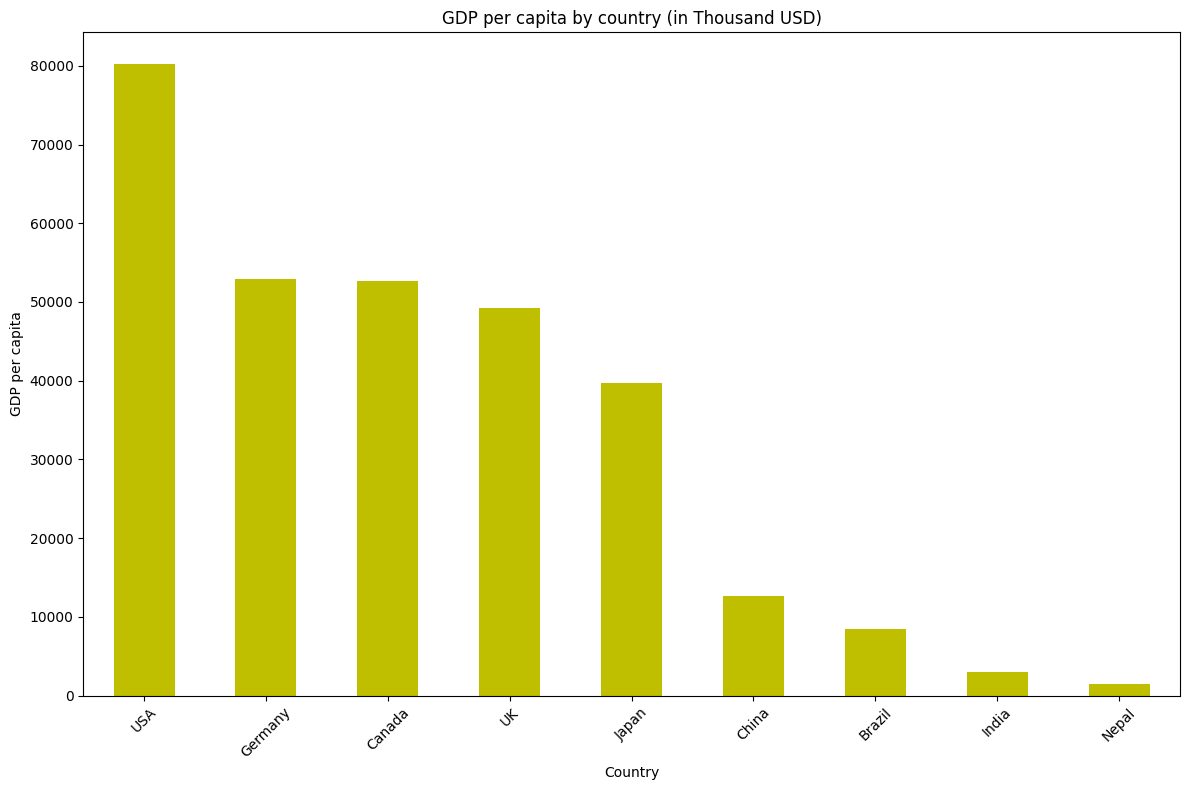

In [30]:
#GDP_per_capita 
df["GDP_per_capita"]=df["GDP(Billion USD)"]/df["Population(M)"]*1000
print(df)

#GDP_per_capita in descending order
df_descending_order=df.sort_values(by="GDP_per_capita",ascending=False)
#print(df_descending_order)

# ✅ Code Cell (Analyze and Plot GDP per Capita)
import matplotlib.pyplot as plt 
df_descending_order["GDP_per_capita"].plot(kind="bar",color="y",figsize=(12,8))
plt.title("GDP per capita by country (in Thousand USD)")
plt.ylabel("GDP per capita")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Task 4: Implementing and Solving a SCIP Model

In this task, you'll write and solve a small linear optimization problem using SCIP.

### ✏️ Problem:
You run a small production facility that can produce two products: **Product 1** and **Product 2**.
- Each unit of Product 1 gives a profit of 3.
- Each unit of Product 2 gives a profit of 5.
- Producing one unit of Product 1 requires 1 hour, and Product 2 requires 2 hours.
- You have 8 hours available in total.

### 🔍 Goal:
Maximize the total profit under the time constraint.

### 🧮 Mathematical Model:

\begin{align*}
\text{Maximize} \quad & 3x_1 + 5x_2 \\
\text{subject to} \quad & x_1 + 2x_2 \leq 8 \\
& x_1 \geq 0, \quad x_2 \geq 0
\end{align*}


Where:
- \( x_1 \): number of units of **Product 1**
- \( x_2 \): number of units of **Product 2**

### ❗ Reminder:
- Both variables must be non-negative.
- You can use real numbers (no integer restriction).

### 🛠️ Steps:
1. Import the Model class from PySCIPOpt.
2. Create a new SCIP model.
3. Define decision variables.
4. Add the constraint: $$ 1 \cdot x_1 + 2 \cdot x_2 \leq 8 $$
5. Add the objective: $$ 3 \cdot x_1 + 5 \cdot x_2 \to \text{max} $$
6. Solve and print the optimal production plan.

In [ ]:
# ✅ Code Cell (SCIP Linear Model with Line-by-Line Explanation)


In [6]:
#1 Import the Model class from PySCIPOT
from pyscipopt import Model 

In [7]:
#2 Creating a new SCIP model
model= Model("Production Planning")

In [8]:
#3 Define Decison Variables.
x_1=model.addVar(name="x_1", vtype="C") #Add variable x1 for product 1 with type "C" (continuous)
x_2=model.addVar(name="x_2",vtype="C") #Add variable x2 for product 1 with type "C" (continuous)


In [9]:
#4 Adding Contraints using addCons(): total time for both products must be <=8 hours
model.addCons(x_1*1+x_2*2<=8)

c1

In [10]:
#5 Set the objective funciton using setObjectieve(): max total profit
model.setObjective(3*x_1+5*x_2, sense="maximize")

In [16]:
#6 solve the optimizaton model using otimize()
model.optimize()

#Retrive and print results using getVal() and getObjeVal()
print("Optimal Production Plan:")
print("Produciton 1 (x1)=", model.getVal(x_1))
print("Prodcution 2 (x2)=", model.getVal(x_2))
print("Maximum Profit =", model.getObjVal())


Optimal Production Plan:
Produciton 1 (x1)= 8.0
Prodcution 2 (x2)= 0.0
Maximum Profit = 24.0
